# Distribuciones estacionarias

<a href="https://colab.research.google.com/github/milocortes/mod_04_concentracion/blob/ccm-2023/src/tareas/tarea_markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np 

T_zhang = np.matrix([ 
                [0.342, 0.005, 0.001, 0.020, 0.632],
                [0.001, 0.252, 0.107, 0.005, 0.635],
                [0.000, 0.043, 0.508, 0.015, 0.434],
                [0.001, 0.002, 0.004, 0.665, 0.328],
                [0.007, 0.007, 0.007, 0.025, 0.954],
    ])
T_zhang


matrix([[0.342, 0.005, 0.001, 0.02 , 0.632],
        [0.001, 0.252, 0.107, 0.005, 0.635],
        [0.   , 0.043, 0.508, 0.015, 0.434],
        [0.001, 0.002, 0.004, 0.665, 0.328],
        [0.007, 0.007, 0.007, 0.025, 0.954]])

In [2]:
tolerancia =  0.2e-15
potencia = 2
error = 1000

while error > tolerancia:
    error = abs(T_zhang**(potencia-1) - T_zhang**potencia).sum()
    potencia += 1
    
potencia


84

In [3]:
T_zhang**potencia


matrix([[0.00966142, 0.00952806, 0.01541038, 0.06835286, 0.89704729],
        [0.00966142, 0.00952806, 0.01541038, 0.06835286, 0.89704729],
        [0.00966142, 0.00952806, 0.01541038, 0.06835286, 0.89704729],
        [0.00966142, 0.00952806, 0.01541038, 0.06835286, 0.89704729],
        [0.00966142, 0.00952806, 0.01541038, 0.06835286, 0.89704729]])

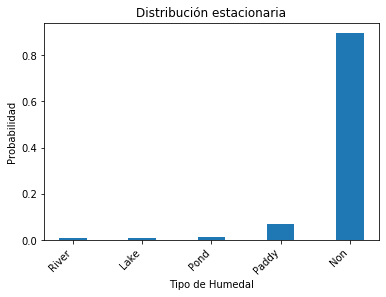

In [4]:

alcaldias = ["River", "Lake", "Pond", "Paddy", "Non"]
probabilidades = (T_zhang**potencia).round(3)[0,:]

# creating the bar plot
plt.bar(alcaldias, probabilidades, width = 0.4)
 
plt.xlabel("Tipo de Humedal")
plt.ylabel("Probabilidad")
plt.title("Distribución estacionaria")
plt.xticks(rotation=45, ha='right')

plt.show()


## Ejercicio 2
La siguiente matriz de transición representa la probabilidad de cambio de alcaldía de acuerdo a la encuesta intercensal de 2015.


Se construyó identificando los flujos de personas que en 2010 vivían en una alcaldía $i$ y que en 2015 vivían en una alcaldía $j$. 

In [5]:

T_cdmx = np.matrix([
        [0.974, 0.002, 0.0, 0.006, 0.001, 0.002, 0.0, 0.0, 0.001, 0.0, 0.001, 0.001, 0.002, 0.004, 0.004, 0.001],
        [0.0, 0.944, 0.001, 0.002, 0.001, 0.01, 0.001, 0.001, 0.004, 0.002, 0.012, 0.004, 0.01, 0.004, 0.002, 0.001],
        [0.0, 0.001, 0.984, 0.001, 0.0, 0.0, 0.0, 0.0, 0.004, 0.0, 0.001, 0.0, 0.001, 0.004, 0.004, 0.0],
        [0.002, 0.002, 0.0, 0.983, 0.001, 0.001, 0.0, 0.0, 0.001, 0.0, 0.001, 0.0, 0.002, 0.004, 0.001, 0.002],
        [0.001, 0.003, 0.0, 0.003, 0.957, 0.015, 0.0, 0.0, 0.002, 0.002, 0.001, 0.0, 0.006, 0.004, 0.002, 0.004],
        [0.0, 0.003, 0.0, 0.001, 0.004, 0.977, 0.0, 0.0, 0.001, 0.004, 0.002, 0.001, 0.003, 0.002, 0.001, 0.001],
        [0.001, 0.003, 0.0, 0.001, 0.0, 0.004, 0.97, 0.0, 0.007, 0.0, 0.008, 0.001, 0.003, 0.001, 0.001, 0.0],
        [0.0, 0.001, 0.0, 0.0, 0.0, 0.001, 0.0, 0.987, 0.001, 0.002, 0.001, 0.004, 0.001, 0.0, 0.001, 0.0],
        [0.001, 0.002, 0.002, 0.001, 0.001, 0.002, 0.002, 0.0, 0.972, 0.0, 0.002, 0.0, 0.006, 0.003, 0.003, 0.001],
        [0.0, 0.004, 0.0, 0.001, 0.0, 0.009, 0.0, 0.001, 0.001, 0.975, 0.002, 0.003, 0.001, 0.001, 0.0, 0.001],
        [0.0, 0.008, 0.0, 0.001, 0.001, 0.002, 0.003, 0.001, 0.003, 0.001, 0.967, 0.003, 0.006, 0.002, 0.002, 0.0],
        [0.001, 0.005, 0.0, 0.001, 0.0, 0.002, 0.0, 0.003, 0.001, 0.003, 0.006, 0.973, 0.002, 0.001, 0.001, 0.0],
        [0.001, 0.013, 0.001, 0.002, 0.004, 0.008, 0.001, 0.0, 0.01, 0.002, 0.006, 0.001, 0.934, 0.009, 0.007, 0.001],
        [0.004, 0.004, 0.0, 0.006, 0.002, 0.004, 0.0, 0.0, 0.002, 0.0, 0.002, 0.0, 0.012, 0.952, 0.006, 0.005],
        [0.008, 0.002, 0.003, 0.002, 0.001, 0.001, 0.0, 0.0, 0.005, 0.0, 0.002, 0.001, 0.009, 0.009, 0.955, 0.002],
        [0.001, 0.002, 0.0, 0.006, 0.005, 0.005, 0.0, 0.0, 0.001, 0.0, 0.002, 0.0, 0.005, 0.005, 0.001, 0.966]])

In [6]:
T_cdmx.sum(axis=1)

matrix([[0.999],
        [0.999],
        [1.   ],
        [1.   ],
        [1.   ],
        [1.   ],
        [1.   ],
        [0.999],
        [0.998],
        [0.999],
        [1.   ],
        [0.999],
        [1.   ],
        [0.999],
        [1.   ],
        [0.999]])

In [7]:
T_cdmx = (T_cdmx/T_cdmx.sum(axis=1))
T_cdmx.sum(axis=1)

matrix([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [8]:
tolerancia =  1e-10
potencia = 2
error = 1000

while error > tolerancia:
    error = abs(T_cdmx**(potencia-1) - T_cdmx**potencia).sum()
    potencia += 1
potencia

1820

In [9]:
(T_cdmx**potencia)

matrix([[0.0485967 , 0.06647062, 0.02947621, 0.11300811, 0.0392935 ,
         0.15459376, 0.01915565, 0.027727  , 0.09242334, 0.05149831,
         0.08485827, 0.04332722, 0.06834041, 0.07074558, 0.05050824,
         0.03997707],
        [0.0485967 , 0.06647062, 0.02947621, 0.11300811, 0.0392935 ,
         0.15459376, 0.01915565, 0.027727  , 0.09242334, 0.05149831,
         0.08485827, 0.04332722, 0.06834041, 0.07074558, 0.05050824,
         0.03997707],
        [0.0485967 , 0.06647062, 0.02947621, 0.11300811, 0.0392935 ,
         0.15459376, 0.01915565, 0.027727  , 0.09242334, 0.05149831,
         0.08485827, 0.04332722, 0.06834041, 0.07074558, 0.05050824,
         0.03997707],
        [0.0485967 , 0.06647062, 0.02947621, 0.11300811, 0.0392935 ,
         0.15459376, 0.01915565, 0.027727  , 0.09242334, 0.05149831,
         0.08485827, 0.04332722, 0.06834041, 0.07074558, 0.05050824,
         0.03997707],
        [0.0485967 , 0.06647062, 0.02947621, 0.11300811, 0.0392935 ,
         0.1545

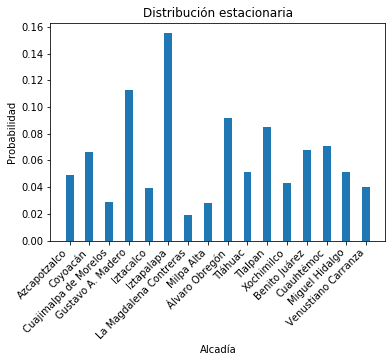

In [10]:

alcaldias = ["Azcapotzalco", "Coyoacán", "Cuajimalpa de Morelos", "Gustavo A. Madero", "Iztacalco", "Iztapalapa", "La Magdalena Contreras", "Milpa Alta", "Álvaro Obregón", "Tláhuac", "Tlalpan", "Xochimilco", "Benito Juárez" , "Cuauhtémoc", "Miguel Hidalgo", "Venustiano Carranza"]
probabilidades = (T_cdmx**potencia).round(3)[0,:]

plt.bar(alcaldias, probabilidades, width = 0.4)
 
plt.xlabel("Alcadía")
plt.ylabel("Probabilidad")
plt.title("Distribución estacionaria")
plt.xticks(rotation=45, ha='right')

plt.show()

## Velocidad de convergencia

La velocidad de convergencia al estado estacionario está determinada por la llamada brecha espectral:

$$
\begin{equation}
    1 - \lambda_{2nd}
\end{equation}
$$

Donde $\lambda_{2nd}$ es el segundo eigenvalor más grande de la matriz de transición.

Una cadena de Markov con una brecha espectral grande converge rapidamente a la distribucion estacionaria. 


In [11]:
from scipy.sparse.linalg import eigs


values, vectors = eigs(T_zhang)

float(values[0]) - float(values[1])

/home/milo/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1268: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)
/home/milo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


0.6653456414036962

In [12]:
values, vectors = eigs(T_cdmx)

float(values[0]) - float(values[1])

/home/milo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


0.011048989847292412